<h1 style="text-align: center; font-family: 'Arial', sans-serif; color: #2c3e50;">
  <strong>Graph Neural Networks - Hands-on session 1</strong>
</h1>

<hr style="border: 1px solid #2c3e50; width: 80%; margin: auto;">

<p style="text-align: center; font-family: 'Arial', sans-serif; color: #34495e; font-size: 18px;">
  This notebook introduces an introductory setup for running a GNN from our GitHub to solve an elliptic problem.
</p>

**GitHub**: https://github.com/LucasUnizar/GNN-Workshop

<p style="text-align: center; font-family: 'Arial', sans-serif; color: #34495e; font-size: 18px;">
  <strong>Authors</strong><br>
  PhD student Lucas Tesan<br>
  PhD student Mikel Martinez
</p>

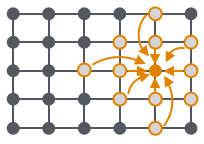


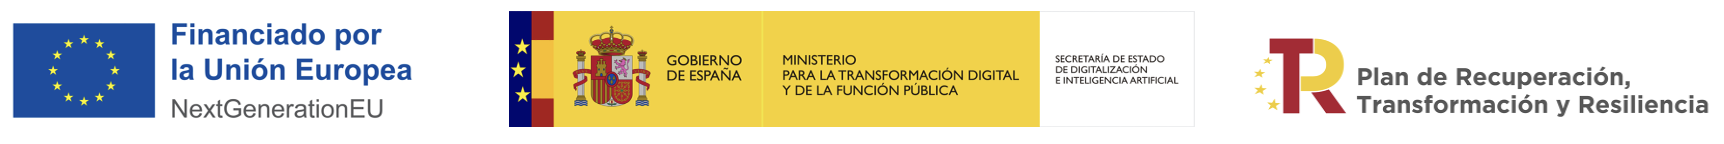

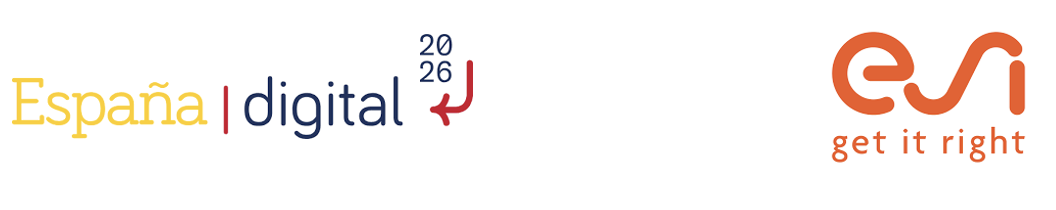

# 🌟 GNNs-Lightning Setup  
### 🛠️ *Environment Configuration & Repository Installation*  

**GitHub Repository:**
---

This section handles all the groundwork—cloning the GitHub repository, installing required libraries, and configuring the environment—so your notebook runs smoothly. Simply execute the cells below to get everything ready!



In [1]:
# Clone the repository
!git clone https://github.com/LucasUnizar/GNN-Workshop --quiet
%cd GNN-Workshop/
!pip install -r requirements.txt --quiet

/content/GNN-Workshop
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 244.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

# **1. Data Visualization**

In this section, we will visualize each dataset to better understand the types of data we are working with, enhancing overall clarity and insight.

## Elliptic Poisson problem

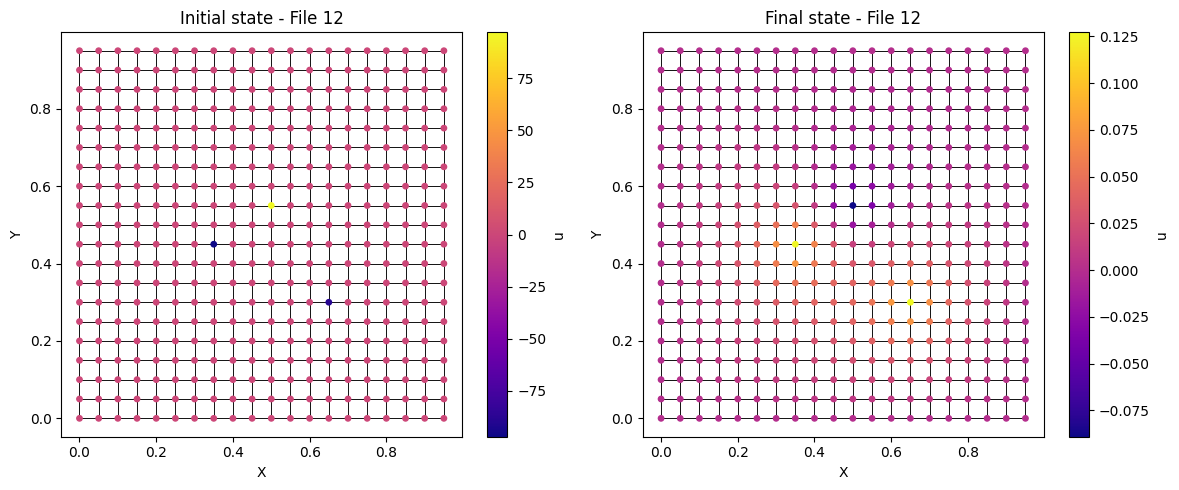

In [2]:
from src.dataloader.datamodule import GraphDataModule

# Data preparatio
data_module = GraphDataModule(dataset_dir='data/Jaca-SummerSchool25_Elliptic_HighRes/dataset', batch_size=8, ratio=1., dataset_type='poisson')
# Setup the data module (this loads the datasets)
data_module.setup(stage='fit')

# Visualize a single sample from the training set
data_module.plot_first_and_last_rollout(traj_index=12)

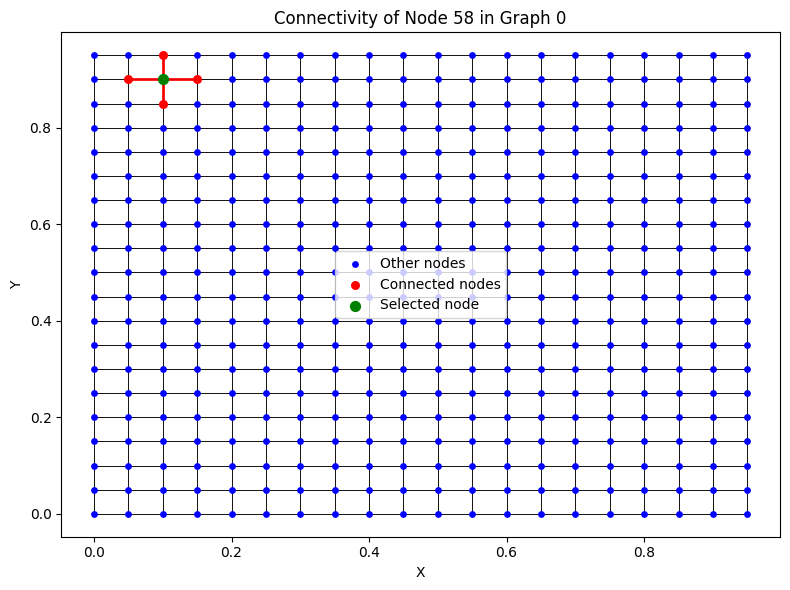

In [3]:
data_module.plot_node_connectivity(traj_index=0, node_index=58)

# **2. Solving the Poisson Equation with Graph Neural Networks**  

In this section, we use **Graph Neural Networks (GNNs)** to solve the **Poisson equation**, an elliptic PDE with applications in electrostatics, fluid mechanics, and more. Traditional numerical methods (e.g., finite differences) are replaced with a **data-driven, single-step prediction** approach.

## **Mathematical Formulation**  
The Poisson equation is defined as:  

$$
\nabla^2 u = f \quad \text{in} \ \Omega
$$

with boundary conditions:  

$$
u = 0 \quad \text{on} \ \partial \Omega
$$

where:
- $u$: Unknown solution (e.g., electric potential),  
- $f$: Known source term (e.g., charge distribution),  
- $\nabla^2$: Laplacian operator,  
- $\Omega$: Spatial domain,  
- $ \partial \Omega $: Domain boundary.

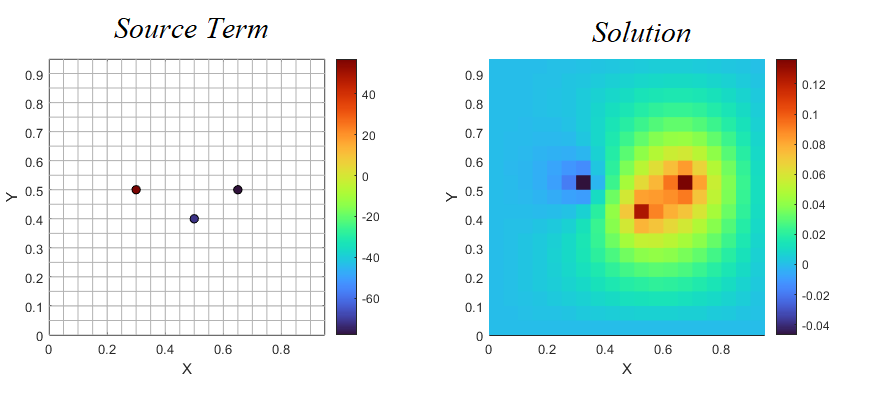

In [4]:
!python train.py --dataset_dir data/Jaca-SummerSchool25_Elliptic_HighRes/dataset --model poisson --hidden 16 --layers 2 --mp_steps 12 --batch_size 64 --lr 1.e-3 --epochs 50 --eval_freq 10

Seed set to 1
Simulator model initialized
Using 1-Step GNN model with 12 message-passing steps
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 3
wandb: You chose "Don't visualize my results"
wandb: WARNING `resume` will be ignored since W&B syncing is set to `offline`. Starting a new run with run id 9xkhah73.
wandb: Tracking run with wandb version 0.20.1
wandb: W&B syncing is set to `offline` in this directory. Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name               | Type                    | Params | Mode 
-----------------------------------------------------------------------
0 | model              | EncoderProcessorDecoder | 10.6 K | train
1 | _input_normalizer  | Normalizer              | 0      | train


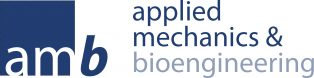

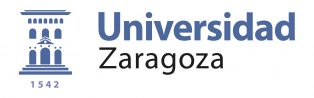